<a href="https://colab.research.google.com/github/Umesh1307/Book-Recommendation-System/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <font color='green'> **Problem Statement:**

---


### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
### web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement
### (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.
---

# <font color='red'> Data Information
---
### The Book-Crossing dataset comprises 3 files.
## ● Users
### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
## ● Books
### Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
## ● Ratings
### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.
---

In [2]:
# Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Let's load the first dataset which user dataset
user_df=pd.read_csv("/content/drive/MyDrive/Almabetter Project/Capstone - Projects/ML (Unsupervised Learning) Recommendation System/Users.csv")

In [5]:
# Let's check the head of dataset
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Let's check the taik of dataset
user_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [7]:
# Let's have a glance at the shape of data
print(f"The user data is having {user_df.shape[0]} rows and {user_df.shape[1]} Columns")

The user data is having 278858 rows and 3 Columns


In [8]:
# Let's get the information about the dataset
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


---
# <font color='green'> Observations:
---
* ### We have data of 278858 users about their location, Age.
* ### User-ID is an unique ID for each users with no null values inside it
* ### Location feature represents the different demographics of users with no null values in it.
* ### Age represents the age of an users. It has some null values.

---




In [9]:
# let's check the unique values each features
user_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [10]:
# let's check the unique values in other features as well
user_df['User-ID'].nunique()

278858

In [11]:
user_df['Location'].nunique()

57339

In [12]:
# Let's have look at null values inside each feature
user_df.isnull().mean()*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [13]:
# Let's check the number of null values inside each features
user_df['Age'].isnull().sum()

110762

In [14]:
# Let's have look at null values
user_df['User-ID'].isnull().sum()

0

In [15]:
# Let's have look at null values
user_df['Location'].isnull().sum()

0

In [16]:
# Let's use a function for understanding the all the features at once
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    unique_values=df.nunique()
    mz_table=pd.concat([mis_val,mis_val_percent,unique_values],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values',2:"# Unique Values"})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [17]:
missing_values(user_df)

,index,Missing Values,% of Total Values,# Unique Values,Data_type
0,Age,110762,39.72,165,float64
1,User-ID,0,0.00,278858,int64
2,Location,0,0.00,57339,object


# Observations:
rainbow.png

* ### There are 110762 values are missing inside age column which is around 40% out of 100%

* ### Age column has 165 unique values.

* ### Location feature has no null values inside it but has high cardinality i.e high number of unique values, so it will be challenging to take care of that.


---








## **Age Distribution**:


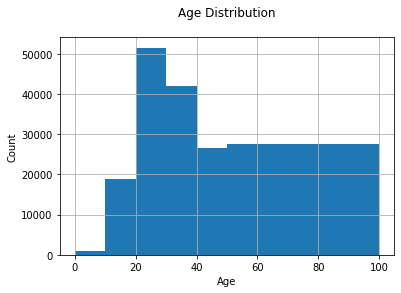

In [18]:
# Let's check the distribution 
user_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### The most active users are among those in their 20–30s.

## Let's check for outliers in age column

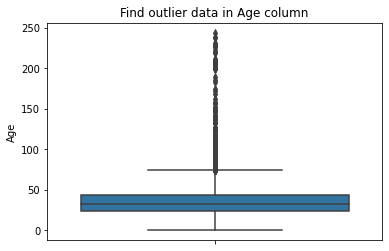

In [19]:
sns.boxplot(y='Age', data=user_df)
plt.title('Find outlier data in Age column')
plt.show()

In [20]:
print(sorted(user_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [21]:
for i in user_df:
    user_df['Country']=user_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [22]:
# Let's check the number of unique country name we have
user_df['Country'].nunique()

529

In [23]:
# Now we can drop the location column
user_df=user_df.drop('Location',axis=1)

In [24]:
user_df.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [25]:
user_df['Country']=user_df['Country'].astype('str')

In [26]:
a=list(user_df.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [27]:
user_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

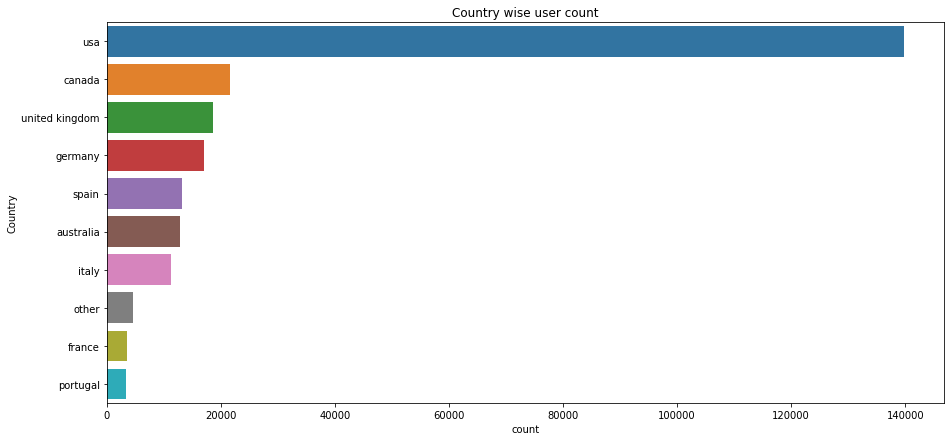

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=user_df,order=pd.value_counts(user_df['Country']).iloc[:10].index)
plt.title('Country wise user count')
plt.show()

Text(0.5, 1.0, 'Age Distribution Plot')

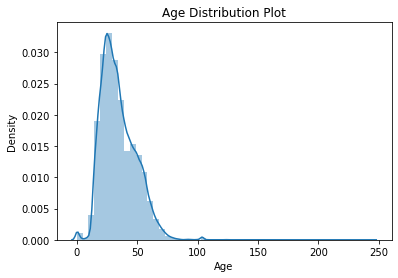

In [29]:
sns.distplot(user_df.Age)
plt.title('Age Distribution Plot')

### Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [30]:
# outlier data became NaN
user_df.loc[(user_df.Age > 100) | (user_df.Age < 5), 'Age'] = np.nan

In [31]:
user_df.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

### Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [32]:
user_df['Age'] = user_df['Age'].fillna(user_df.groupby('Country')['Age'].transform('median'))

In [33]:
user_df['Age'].isnull().sum()

276

In [34]:
user_df['Age'].fillna(user_df.Age.mean(),inplace=True)

In [35]:
user_df.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64



---


# <font color='green'> 2)Books Dataset:

---

## Now explore the Books Dataset tha we have!

In [36]:
# Loading the book dataset we have
books_df=pd.read_csv("/content/drive/MyDrive/Almabetter Project/Capstone - Projects/ML (Unsupervised Learning) Recommendation System/Books.csv")

In [37]:
# Let's check the head of book dataset
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [38]:
# Let's have a look at the tail of dataset
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [39]:
# Let's check the information of the books dataset
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB




---


# **Observations:**

---

* ### There 7 features in books dataset namely ISBN, Book-Title, Book-Author, Year-of-Publication, 'Publisher', 'Image-URL-S','Image-URL-M','Image-URL-L".

* ## ISBN: 
### An ISBN is an International Standard Book Number. ISBNs were 10 digits in length up to the end of December 2006, but since 1 January 2007 they now always consist of 13 digits. ISBNs are calculated using a specific mathematical formula and include a check digit to validate the number.

* ## Book-Title:
### The title of a book, or any other published text or work of art, is a name for the work which is usually chosen by the author.

* ## Book-Author:
### An author is the creator or originator of any written work such as a book or play, and is also considered a writer or poet. More broadly defined, an author is "the person who originated or gave existence to anything" and whose authorship determines responsibility for what was created.

* ## Year-of-Publication:
### The date on which a book or periodical is or is planned to be published.

* ## Publisher:
### A person or company that publishes books, magazines, etc.
* ## Image-URL-S, Image-URL-M, Image-URL-L:
### Small, Median, Long URL for searching images.


---



In [40]:
# Let's check the shape of the book dataset
print(f"The shape of the book dataset : {books_df.shape[0]} rows | {books_df.shape[1]} columns")

The shape of the book dataset : 271360 rows | 8 columns


In [41]:
# Let's look at the null values inside the book dataset
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64



---


# Observations:


---


* ### There is 1 missing value in Book-Author feature.
* ### Publisher feature has two missing values.
* ### Image-URL-L has 3 missing values.

## Let's see how we can handle them

---



In [42]:
missing_values(books_df)

,index,Missing Values,% of Total Values,# Unique Values,Data_type
0,ISBN,0,0.0,271360,object
1,Book-Title,0,0.0,242135,object
2,Book-Author,1,0.0,102023,object
3,Year-Of-Publication,0,0.0,202,object
4,Publisher,2,0.0,16807,object
5,Image-URL-S,0,0.0,271044,object
6,Image-URL-M,0,0.0,271044,object
7,Image-URL-L,3,0.0,271041,object


In [43]:
books_df['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [44]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

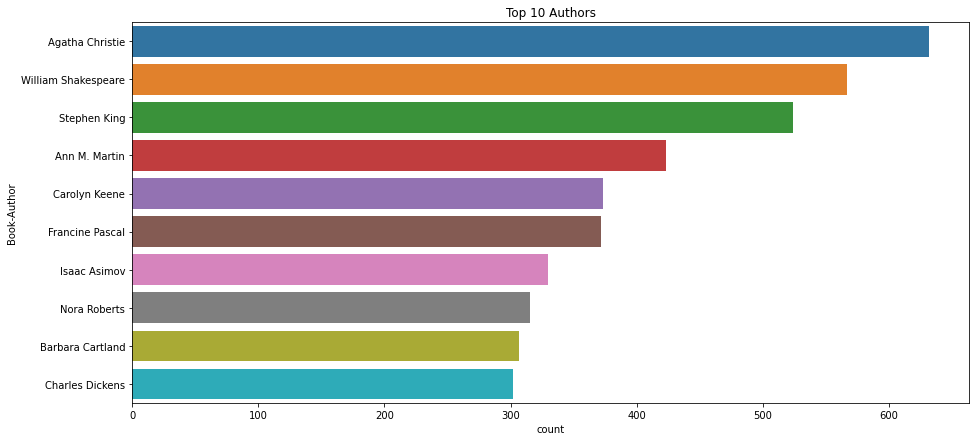

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books_df,order=pd.value_counts(books_df['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')
plt.show()

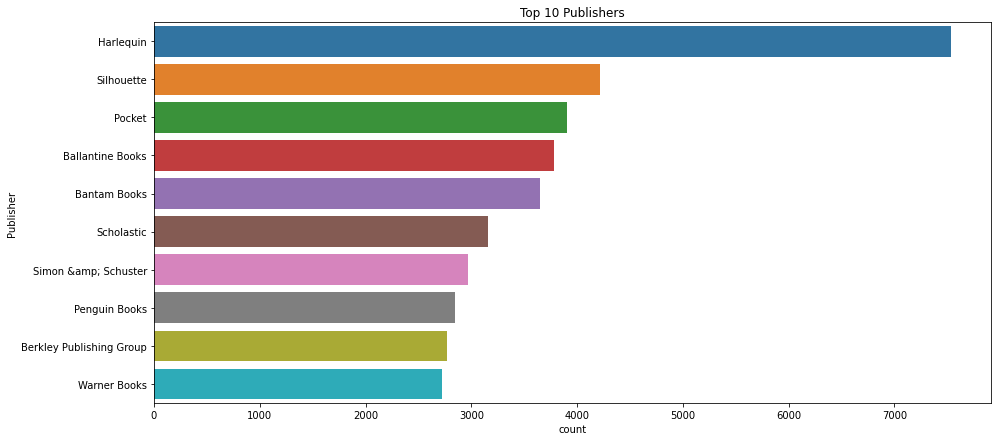

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')
plt.show()

In [47]:
books_df['Year-Of-Publication']=books_df['Year-Of-Publication'].astype('str')
a=list(books_df['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [48]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [49]:
# Making the correction
books_df.loc[books_df['ISBN']=="0789466953",'Year-Of-Publication']=2000
books_df.loc[books_df['ISBN']=='0789466953','Book-Author']="James Buckley"
books_df.loc[books_df['ISBN']=='0789466953','Publisher']='DK Publishing Inc'
books_df.loc[books_df['ISBN']=='0789466953','Book-Title']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [50]:
#investigating the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [51]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books_df.loc[books_df.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [52]:
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

print(sorted(books_df['Year-Of-Publication'].unique()))
#Now it can be seen that year OfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]




---


### The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

---



In [53]:
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [54]:
#dropping last three columns containing image URLs which will not be required for analysis
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [55]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [56]:
#exploring 'publisher' column
books_df.loc[books_df.Publisher.isnull(),:]
#two NaNs

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [57]:
#Filling Nan of Publisher with others
books_df.Publisher.fillna('other',inplace=True)

In [58]:
#exploring 'Book-Author' column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [59]:
#Filling Nan of Book-Author with others
books_df['Book-Author'].fillna('other',inplace=True)

In [60]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 3) Ratings_Dataset

---



In [63]:
# Let's load the rating dataset
rating_df=pd.read_csv("/content/drive/MyDrive/Almabetter Project/Capstone - Projects/ML (Unsupervised Learning) Recommendation System/Ratings.csv")

In [64]:
# Let's Check the head of the rating dataset
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [65]:
# Let's check the tail of the rating dataset
rating_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


### Ratings dataset should have books only which exist in our books dataset.

In [71]:
# Taking only those rating for which we have books in our book dataframe
rating_new_df = rating_df[rating_df.ISBN.isin(books_df.ISBN)]
rating_df.shape,rating_new_df.shape

((1149780, 3), (1031136, 3))

In [72]:
# Let's check the missing value statistics for new rating df
missing_values(rating_new_df)

,index,Missing Values,% of Total Values,# Unique Values,Data_type
0,User-ID,0,0.0,92106,int64
1,ISBN,0,0.0,270151,object
2,Book-Rating,0,0.0,11,int64




---


### It can be seen that many rows having book ISBN not part of books dataset got dropped off

### Ratings dataset should have ratings from users which exist in users dataset.

---



In [73]:
print("Shape of dataset before dropping",rating_new_df.shape)
rating_new_df = rating_new_df[rating_new_df['User-ID'].isin(user_df['User-ID'])]
print("shape of dataset after dropping",rating_new_df.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


### It can be seen that no new user was there in ratings dataset.

## Let's see how the ratings are distributed

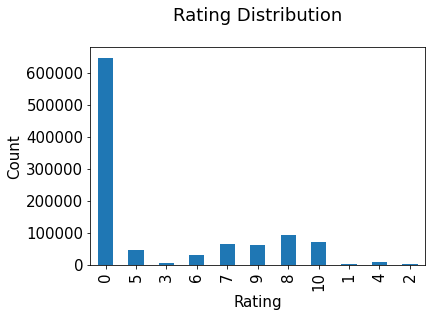

In [74]:
plt.rc("font", size=15)
rating_new_df['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [75]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = rating_new_df[rating_new_df['Book-Rating'] != 0]
ratings_implicit = rating_new_df[rating_new_df['Book-Rating'] == 0]

In [76]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


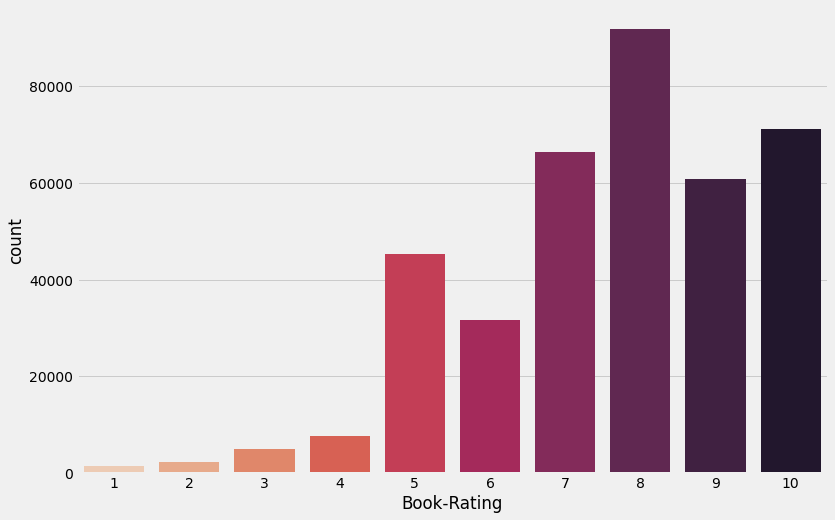

In [77]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

### It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [78]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


### The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [80]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


### The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

---



In [81]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [82]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


# Merging All Dataset

In [83]:
Final_Dataset=user_df.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books_df,on='ISBN')

In [84]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
